In [1]:
import pandas as pd
import matplotlib.pyplot as plt


study_data = pd.read_csv('study.csv')
mouse_data = pd.read_csv('mouse.csv')

#Set Dependencies


#Model Observations

#As the number of regimens increased, mice per timepoints decreased
#Final tumor volume averages were similar between Infubinol & Ceftamin with Infubinol containing an outlier
#As timepoint increases tumor volume slighly decreases


In [2]:
study_data.head()

#Display Study File

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_data.head()

#Display Mouse File

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
merge = pd.merge(mouse_data, study_data, on = 'Mouse ID', how='outer')
merge

data_regimen = merge.groupby(["Drug Regimen"])
data_regimen

rmean = data_regimen["Tumor Volume (mm3)"].mean()
rmed = data_regimen["Tumor Volume (mm3)"].median()
rvar = data_regimen["Tumor Volume (mm3)"].var()
rstd = data_regimen["Tumor Volume (mm3)"].std()
rsem = data_regimen["Tumor Volume (mm3)"].sem()


summary_data = pd.DataFrame({"Mean": rmean, "Median": rmed, "Variance": rvar, "Std Dev": rstd, "SEM": rsem})
summary_data

#Summary Stat Table

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


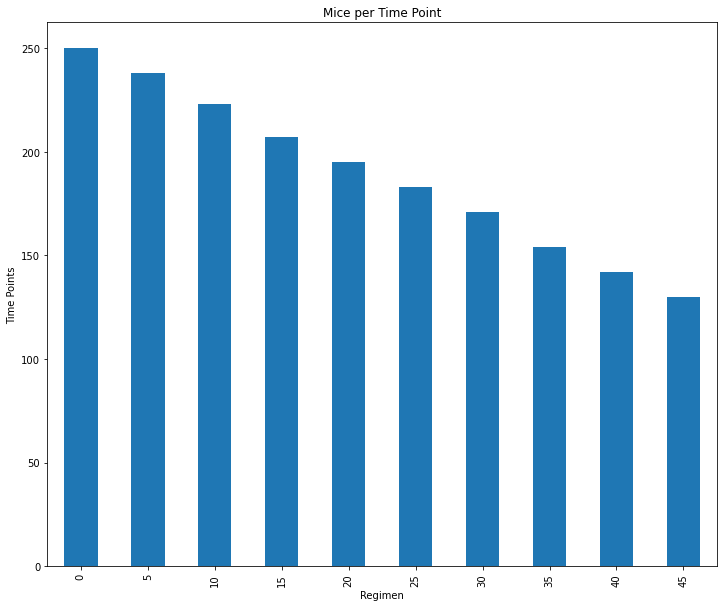

In [5]:
time_points = merge.groupby(["Timepoint"]).count()["Mouse ID"]
time_points

time_points.plot(kind="bar", figsize=(12,10))
plt.title("Mice per Time Point")
plt.xlabel("Regimen")
plt.ylabel("Time Points")
plt.show()

#Mice per Time Point


In [6]:
regimes_test = merge[merge["Drug Regimen"].isin(["Capomulin", "Ramicare", "Ramicane", "Infubinol", "Ceftamin"])]
regimes_test = regimes_test.sort_values(["Timepoint"], ascending=True)
regimes_test
                                        
regimes_info = regimes_test[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]         
regimes_info.head()

#Final Tumor Volume

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Ramicane,k403,45.0
1391,Infubinol,q132,45.0
195,Capomulin,i738,45.0
205,Ramicane,a520,45.0
1370,Ceftamin,p438,45.0


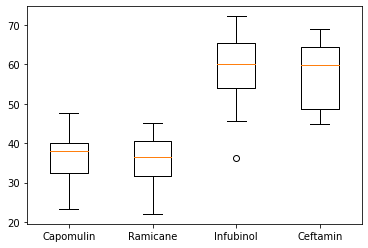

In [7]:
sort = regimes_test.groupby(['Drug Regimen', 'Mouse ID']).last()["Tumor Volume (mm3)"]
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_box = sort.to_frame()
regimen_box
initial_df = regimen_box.reset_index()
tumors = initial_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumors_df = pd.DataFrame(tumors)
tumors_df = tumors_df.reindex(drug)
tumor_volume = [vol for vol in tumors_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume, labels=drug)
plt.show()

#Box Plot

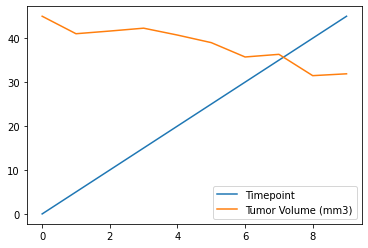

In [8]:
time_tumer = merge[merge["Mouse ID"].isin(["y793"])]
time_tumer
time_data = time_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_data
line_data = time_data.reset_index()
line_info =line_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_info
lines = line_info.plot.line()

#Line Plot for Single Mouse


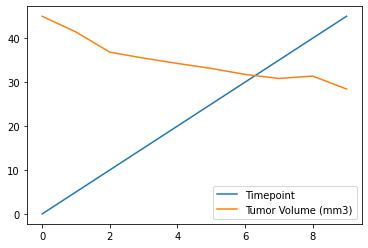

In [9]:
time_tumer = merge[merge["Mouse ID"].isin(["m601"])]
time_tumer
time_data = time_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_data
line_data = time_data.reset_index()
line_info =line_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_info
lines = line_info.plot.line()

#Line Plot for add'l Cap mouse